In [1]:
import pandas as pd
import numpy as np 
import string
from nltk.corpus import stopwords
import nltk
import seaborn as sns

In [2]:
file_path = "spam.csv"
df = pd.read_csv(file_path, encoding = 'latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis =1, inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df = df.rename(columns={'v1' : 'label', 'v2' :'email'})

In [5]:
df["label_num"] = df["label"].map ({"spam": 1, "ham" : 0})

In [6]:
df.head()

,label,email,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:

stop_words = set(stopwords.words('english'))

def text_preprocess(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

# Apply preprocessing
df['cleaned_message'] = df['email'].apply(text_preprocess)

In [8]:

from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Convert cleaned email text to vectors
email_vectors = vectorizer.fit_transform(df['cleaned_message'])

# Check the shape of the resulting vectorized email data
print("Vectorized email shape:", email_vectors.shape, type(email_vectors))

# email_vectors is a sparse matrix. You can convert it to an array if needed
# email_vectors = email_vectors.toarray()

Vectorized email shape: (5572, 9376) <class 'scipy.sparse._csr.csr_matrix'>


<Axes: xlabel='label', ylabel='count'>

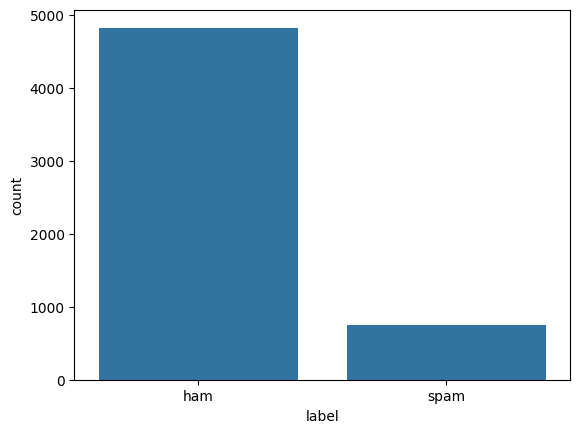

In [9]:
sns.countplot(x = df["label"])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( email_vectors, df['label_num'], test_size = 0.2,random_state= 10)


In [11]:
X_train


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 37816 stored elements and shape (4457, 9376)>

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [13]:
def compute_cost(X, y, w, b):

    m, n = X.shape
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        fx = sigmoid (z)
        cost += -y[i] * np.log(fx)- (1-y[i]) * np.log (1- fx)
    total_cost = cost/m


    return total_cost


In [14]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]  # Number of training examples

    # Compute predictions
    predictions = sigmoid(np.dot(X, w) + b)
    
    # Compute errors
    errors = predictions - y

    # Compute gradients
    w_grad = np.dot(X.T, errors) / m
    b_grad = np.sum(errors) / m
    
    return b_grad, w_grad


In [15]:
import numpy as np

def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    m = X.shape[0]  # Number of training examples
    n = X.shape[1]  # Number of features
    
    # Initialize variables
    w = w_in
    b = b_in
    
    J_history = []  # To store cost values at each iteration

    for i in range(num_iters):
        # Compute the gradients using your existing function
        dj_db, dj_dw = compute_gradient(X, y, w, b)
        
        # Update parameters
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        # Compute and store the cost using your existing function
        if i < 100000:  # Prevent resource exhaustion
            cost = compute_cost(X, y, w, b)
            J_history.append(cost)
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % max(1, num_iters // 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")

    return w, b, J_history


In [35]:
# Initialize parameters
w = np.zeros(X_train.shape[1]) 
b = 0
iters = 10000
alpha = 0.01
X_train_array = X_train.toarray()
y_train_array = y_train.to_numpy()

print(type(X_train_array))
print(type(y_train_array))

w_final, b_final,cost_history =gradient_descent(X_train_array, y_train_array, w, b, alpha, iters)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Iteration    0: Cost 0.6917967202597431
Iteration 1000: Cost 0.3999832750950642
Iteration 2000: Cost 0.3879908379236109


In [34]:
w_final

array([ 0.02072779,  0.00977268,  0.01335889, ...,  0.0119028 ,
       -0.01526398, -0.00240327])

In [32]:
def predict(X, w, b): 

    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
  
    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) + b

        # Calculate the prediction for this example
        f_wb = sigmoid (z_wb)
        print(f_wb)
        # Apply the threshold
        p[i] = 1.0 if f_wb > 0.5 else 0 
        
    return p

In [33]:
X_test_array = X_test.toarray()
y_test_array = y_test.to_numpy()

predictions = predict(X_test_array, w_final, b_final)

0.12428938767361847
0.12451394875873611
0.1357593910689547
0.11724161705159049
0.13565238853127543
0.12047820158500193
0.1262715125972383
0.17404897915759693
0.12489491599956667
0.13164132827682334
0.11771070799236741
0.11716440524754503
0.1316677093508517
0.12550310102830037
0.1281713803103854
0.12354720961745175
0.11550149374803306
0.11823597538902024
0.12722162682629135
0.13285907023090057
0.11620187820711526
0.11673893522289644
0.2788820678089958
0.13896950144716946
0.11973132334923715
0.1257482357407185
0.11205293681894235
0.1304767256169258
0.11440335399750085
0.12548801868232845
0.1301941528737884
0.1840986046658546
0.10439027610693999
0.13360187089721962
0.12945585780932983
0.13336051415097006
0.13114510124807255
0.11921049165455959
0.1257151350969307
0.11900464188349631
0.12103449996899746
0.1242133755988329
0.12288718424030447
0.1246809728285433
0.1222311946775353
0.12711150788455924
0.13217388266745425
0.12747316990845836
0.11883287550246281
0.1096390441541928
0.149230581730

In [23]:
cm = np.array([[0,0],[0,0]])
for i,j in zip(y_test_array, predictions):
    if i == j and i == 0:
        cm[0][0] = cm[0][0] + 1
    elif i == j and j == 1:
        cm[1][1] = cm[1][1] + 1
    elif i != j and i == 0:
        cm[0][1] = cm[0][1] + 1
    else:
        cm[1][0] = cm[1][0] + 1

In [24]:
cm

array([[965,   0],
       [150,   0]])

In [25]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

In [26]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
accuracy

np.float64(0.8654708520179372)

In [29]:
def accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    return correct_predictions / len(y_true)
acc = accuracy(y_test_array, predictions)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 86.55%


In [31]:
def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    return tp / (tp + fp) if (tp + fp) != 0 else 0

# Example usage:
prec = precision(y_test_array, predictions)
print(f"Precision: {prec:.2f}")


Precision: 0.00
